# CNN için giriş, data augmentation ve drop out olayları
## Kullandığım veriyi internetten kendim topladım.
    Kullandığım veride 2 tür resim vardır. Gömlek ve kol saati. Data augmentation'u daha iyi görebilmek amacıyla her ikisinden de ayrı ayrı 200 adet resim buldum. Resimlerin hepsi google fotoğraflardan alınmıştır. Kullandığım verinin linki : https://drive.google.com/drive/folders/1BkI94CNRtbBdjmimxwkbnzJH7nbHbDX7?usp=sharing

In [1]:
import keras 

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


    İlk olarak keras'ı import ediyoruz.

In [10]:
import os, shutil

original_dataset_dir = '/Users/Oğuzhan/Desktop/project/birlesik/'

base_dir='/Users/Oğuzhan/Desktop/project/ayirma'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
##gereken klasörleri oluşturduk (train-test-validasyon)

train_shoes_dir=os.path.join(train_dir,'shoes')
os.mkdir(train_shoes_dir)

train_watchs_dir=os.path.join(train_dir,'watchs')
os.mkdir(train_watchs_dir)


validation_shoes_dir=os.path.join(validation_dir,'shoes')
os.mkdir(validation_shoes_dir)

validation_watchs_dir=os.path.join(validation_dir,'watchs')
os.mkdir(validation_watchs_dir)


test_shoes_dir=os.path.join(test_dir,'shoes')
os.mkdir(test_shoes_dir)

test_watchs_dir=os.path.join(test_dir,'watchs')
os.mkdir(test_watchs_dir)

##Yukarıda üç klasör için shoes ve watchs(ayakkabı ve kol saati)
## klasörleri oluşturduk

fnames = ['shoes.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_shoes_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['shoes.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_shoes_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['shoes.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_shoes_dir, fname)
    shutil.copyfile(src, dst)

## Yukarıda ise ayakkabılar için, train içine 100 adet resmi
## diğer iki klasör içine ise 50-50 resmi kopyaladık
    
fnames = ['watchs.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_watchs_dir, fname)
    shutil.copyfile(src, dst)
    
    
fnames = ['watchs.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_watchs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['watchs.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_watchs_dir, fname)
    shutil.copyfile(src, dst)
    
## Yukarıda ise kol saati içine train için 100 adet resmi
## diğer iki klasör içine ise 50-50 resmi kopyaladık

    Yukarıda ilk olarak öncelikle 3 adet klasör oluşturuluyor. Train, test ve validation klasörlerini oluşturduktan sonra her 3 klasör için shoes ve watchs klasörleri oluşturuluyor.

In [11]:
print('Train için ayrılan ayakkabı resmi:', len(os.listdir(train_shoes_dir)))

Train için ayrılan ayakkabı resmi: 100


In [12]:
print('Train için ayrılan kol saati resmi:', len(os.listdir(train_watchs_dir)
                                                ))

Train için ayrılan kol saati resmi: 100


In [13]:
print('Validation için ayrılan ayakkabı resmi:', len(os.listdir(validation_shoes_dir)))

Validation için ayrılan ayakkabı resmi: 50


In [14]:
print('Validation için ayrılan kol saati resmi:', len(os.listdir(validation_watchs_dir)))

Validation için ayrılan kol saati resmi: 50


In [15]:
print('Test için ayrılan ayakkabı resmi:', len(os.listdir(test_shoes_dir)))

Test için ayrılan ayakkabı resmi: 50


In [16]:
print('Test için ayrılan kol saati resmi:', len(os.listdir(test_watchs_dir)))

Test için ayrılan kol saati resmi: 50


# Katmanları oluşturma
Öncelikle kullandığımız katman modelinde Conv2D ve MaxPooling2D kullanılmıştır. İlk layer'da 32 adet node ve giriş şeklini (width-height oranını) en-boy oranını ayarladık. Bu katman için maxpooling yaptıktan sonra diğer katmanda 64 node kullandık. Yine maxpooling yaptıktan sonra 128 node'lik iki katman oluşturduk ve bu matrisleri Flatten() ile düzleştirdik.

Son olarak dense layer'ı ile tek hale getirdik.

In [17]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Modelimize bakalım.

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [19]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Data Preprocessing
Burada dosyalarımızdaki resimleri okuruz. Jpeg olduğu için onları önce rgb pixellerine (yani 0 ile 255) arasında gömerek programın işini daha da kolaylaştırırız. Bu sayıları 0 ile 1 arasında sıkıştırarak programın daha iyi sonuç bulmasını sağlarız(rescale). Bunun için keras.preprocessing.image kullanırız.

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(
    ## Train klasörünün yerini gösteriyoruz
    train_dir,
    ## Tüm resimleri 150x150 yapıyoruz
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


# Modelimizi Eğitme (30 epoch)
Modelimizde öncelikle 30 epoch ile eğitim yapacağız. Her epoch için 100 adım vardır. Validation adımı ise 50 adımdır.

In [21]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 151s 2s/step - loss: 0.3019 - acc: 0.8565 - val_loss: 0.2065 - val_acc: 0.9200
Epoch 2/30
100/100 [==============================] - 90s 899ms/step - loss: 0.1197 - acc: 0.9540 - val_loss: 0.2494 - val_acc: 0.9000
Epoch 3/30
100/100 [==============================] - 90s 895ms/step - loss: 0.0552 - acc: 0.9835 - val_loss: 0.1993 - val_acc: 0.9200
Epoch 4/30
100/100 [==============================] - 91s 908ms/step - loss: 0.0231 - acc: 0.9935 - val_loss: 0.5308 - val_acc: 0.8800
Epoch 5/30
100/100 [==============================] - 90s 903ms/step - loss: 0.0156 - acc: 0.9950 - val_loss: 0.2311 - val_acc: 0.9200
Epoch 6/30
100/100 [==============================] - 94s 939ms/step - loss: 0.0044 - acc: 0.9990 - val_loss: 0.2497 - val_acc: 0.9300
Epoch 7/30
100/100 [==============================] - 88s 881ms/step - loss: 0.0086 - acc: 0.9975 - val_loss: 0.2680 - val_acc: 0.9300
Epoch 8/30
100/100 [==============================] - 86s

Modelimizi kaydedelim.

In [22]:
model.save('shoes_and_watchs_1.h5')

# Model gösterimi
Programımızın loss grafiğini ve accuracy grafiğine bakarak modelimizin uygun olup olmadığını yorumlayalım.

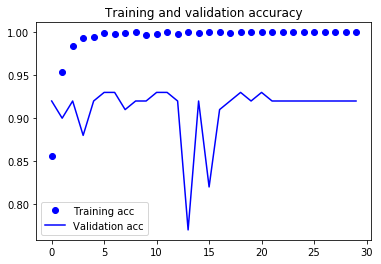

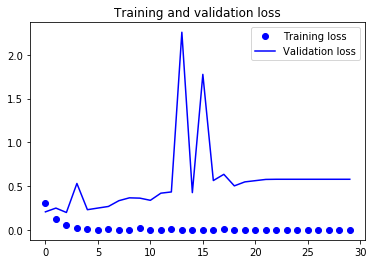

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Gördüğümüz gibi validation ve training loss'ları oldukça kötü seviyede. Bu durumda bu model gerçek dünyaya uyumlu olamaz ve işe yaramaz. Training accuracy gittikçe yükselirken (neredeyse 1 e geliyor.) yani ezberlerken (overfitting) validation accuracy pekte stabil bir hareket elde edememiştir. Aynı zamanda iki veride de training ve validation birbirinden çok uzakta. Bu durum modelin gerçekten de pek iyi olmadığını gösteriyor. İlk 3 ve 4. epochta birbirlerine yakınlarken diğerlerinde bir o kadar uzaktalar.

# Data Augmentation Kullanımı
Yukarıda gördüğümüz üzere modelimiz pekte işe yarayan bir model olamadı. Bunun ilk sebebi datasetimizin çok az olması ve ikinci olarak epoch sayısının çokluğu. Veri seti az olduğu zamanlarda ezberlemeyi engellemek için birkaç yöntem geliştirilmiştir. Bunlardan ilki data augmentation. Data augmentation bir veriyi genişleterme, küçültme gibi varyasyonları kullanarak modeldeki veri miktarını arttırır. Bu sayede programda daha iyi sonuçlar vermeye ve overfitting engellemesi yapmayı sağlar. Bunu yapmak için ImageDataGenerator özelliğini yine kullanacağız. Bu sayede daha iyi sonuç elde etmeyi deneyeceğiz.

In [27]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Yukarıda yaptığımız olayda okunabildiği gibi resmin yönünü zoomlama'yı, ayna görüntüsü elde etme gibi birkaç özellik kullanıyoruz. Şimdi yeni oluşturduğumuz resimlere bakalım.

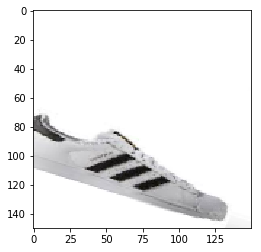

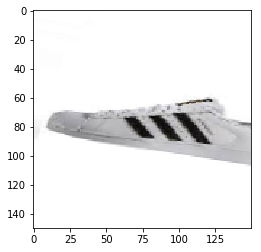

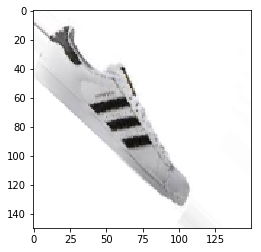

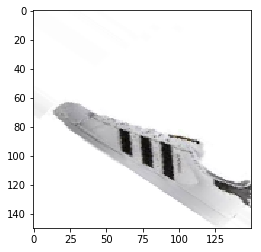

In [28]:
from keras.preprocessing import image

fnames = [os.path.join(train_shoes_dir, fname) for fname in os.listdir(train_shoes_dir)]

## Rastgele bir resim seçiyoruz
img_path = fnames[3]

## Resmi okuyoruz ve yeniden şekillendiriyoruz.
img = image.load_img(img_path, target_size=(150, 150))

## 150,150,3 şeklinde dizi yapıyoruz
x = image.img_to_array(img)

## Yeniden şekillendiriyoruz (1,150,150,3)
x = x.reshape((1,) + x.shape)

## .flow() fonksiyonu yeniden transform edilmiş resim için batch oluşturur.
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Gördüğümüz gibi resimlerin değişik versiyonlarını oluşturdu. Bu sayede birbirinden farklı resimler oluşturulur her resim için. Bu olay modeli eğitirken işimize yarayacak.

# Modelimizi tekrar eğitelim (10 epoch)
Bu sefer modelimizi 10 epoch ile eğiteceğiz. Eğitmeden önce verilerimize augmentation uyguluyayıp yapacağız. Aradaki farkı tekrar yorumlayacağız.

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

## Gördüğümüz gibi burada validation augmente edilmez. (Karışıklık
## çıkmaması için.)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        ## Hedef yolumuz.
        train_dir,
        ## tüm resimler 150x150 yapıldı
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 127s 1s/step - loss: 0.5407 - acc: 0.8560 - val_loss: 0.3289 - val_acc: 0.8600
Epoch 2/10
100/100 [==============================] - 123s 1s/step - loss: 0.2573 - acc: 0.8919 - val_loss: 0.1625 - val_acc: 0.9200
Epoch 3/10
100/100 [==============================] - 124s 1s/step - loss: 0.2035 - acc: 0.9147 - val_loss: 0.1073 - val_acc: 0.9500
Epoch 4/10
100/100 [==============================] - 126s 1s/step - loss: 0.1878 - acc: 0.9241 - val_loss: 0.3567 - val_acc: 0.8800
Epoch 5/10
100/100 [==============================] - 122s 1s/step - loss: 0.1614 - acc: 0.9300 - val_loss: 0.0869 - val_acc: 0.9700
Epoch 6/10
100/100 [==============================] - 123s 1s/step - loss: 0.1694 - acc: 0.9313 - val_loss: 0.0779 - val_acc: 0.9700
Epoch 7/10
100/100 [==============================] - 123s 1s/step - loss: 0.1485 - acc: 0.9437 - val_loss: 0.0930 - val

Modelimizi kaydedelim

In [30]:
model.save('shoes_and_watchs_2.h5')

Son olarak modelimizin sonuçlarını görelim

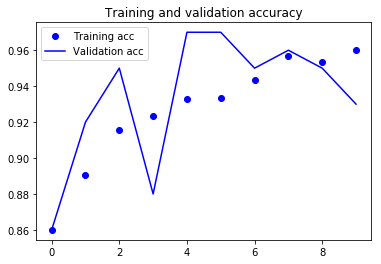

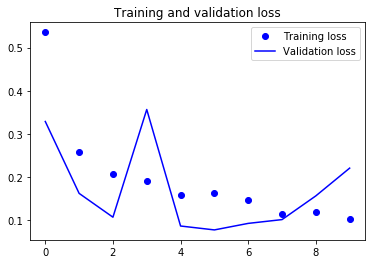

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Önceki augmente edilmemiş modele göre daha iyi bir sonuç elde ettiğimizi söyleyebiliriz. Accuracy yükseldikçe validation bazı yerlerde yükselirken bazı yerlerde düşüse geçmiştir. Loss'ta aynı şekilde birbirlerine daha da yaklaşmaya başlamışlardır. Fakat bu durumda daha da birbirlerine yaklaştıklarını söyleyeibliriz. Fakat birkaç yöntem daha göreceğimiz için burada fazla üzerinde durulmayacaktır.

# Drop - Out Kullanımı
Drop out bir regularization yöntemidir. Veriyi aşırı öğrenmeyi (overfitting) önlemek için kullanılır. Eğitim sırasında bazı katmanların belirli kısımları rastgele seçilerek devre dışı bırakılır. Bu sayede katmanlar başka katmanların çıktılarına güvenmek yerine öğrenmeye zorlanır. 0,2 ve 0,5 arasında değerler alır. En efektif olan yöntemlerden birisidir.


In [33]:
## kullanımı  model.add(layers.Dropout(0.5))

Modelimizdeki katmanlara dört adet ekleyelim ve sonucu görelim.

In [38]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Yeni katmanlar eklediğimiz için tekrar compile etmek gerekir.

In [39]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Modelimizi Tekrar Eğitelim (10 epoch)
Bakalım augmented ve drop out ile etkisi ve farkları neler olacak.

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

## Gördüğümüz gibi burada validation augmente edilmez. (Karışıklık
## çıkmaması için.)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        ## Hedef yolumuz.
        train_dir,
        ## tüm resimler 150x150 yapıldı
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 137s 1s/step - loss: 0.7440 - acc: 0.5472 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 134s 1s/step - loss: 0.6222 - acc: 0.6452 - val_loss: 0.6332 - val_acc: 0.8300
Epoch 3/10
100/100 [==============================] - 143s 1s/step - loss: 0.4830 - acc: 0.7700 - val_loss: 0.5253 - val_acc: 0.7600
Epoch 4/10
100/100 [==============================] - 168s 2s/step - loss: 0.4191 - acc: 0.8034 - val_loss: 0.5115 - val_acc: 0.7000
Epoch 5/10
100/100 [==============================] - 158s 2s/step - loss: 0.3724 - acc: 0.8303 - val_loss: 0.5373 - val_acc: 0.6400
Epoch 6/10
100/100 [==============================] - 141s 1s/step - loss: 0.3574 - acc: 0.8362 - val_loss: 0.4876 - val_acc: 0.7600
Epoch 7/10
100/100 [==============================] - 157s 2s/step - loss: 0.3246 - acc: 0.8500 - val_loss: 0.4643 - val

Modelimizi kaydedelim.

In [41]:
model.save('shoes_and_watchs_3.h5')

Sonuçları gösterelim.

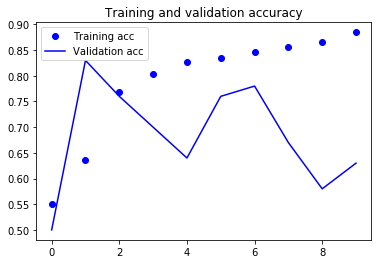

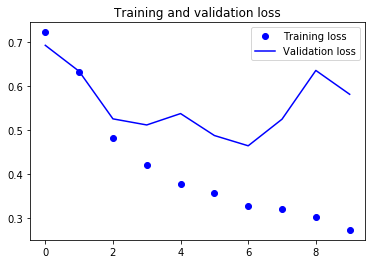

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Bu sonuçta gördüğümüz üzere modelimiz daha da birbirine yakınlaşmaya başladı.
Training ve validation loss hala birbirinden ayrı olsada kısmen öncekilere
göre daha yakınlaşmaya başladılar. Bu olay modelimizin öğrenmeye başladığını
ve overfittingi azda olsa engellediğini gösteriyor.

# Epoch Kesme Kullanımı

Epoch kesmek için öncelikle overfit edilen noktayı bulmamız gerekir. Yukarıda görüldüğü üzere 4'ten 5 e geçerken kopmalar başlıyor. Bizim burada callback kullanarak kesme işlemi yapmamız gerekir.

In [43]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Overfittingi engellemek için erken durduma(early stop) yapacağımız yeri 5 epochtan sonra val_loss artmaza şeklinde ayarlıyoruz 

In [44]:
earlystop = EarlyStopping(patience=7)

Öğrenme oranını accuracy artmıyorsa düşüreceğiz. Bu sayede overfittingi engellemeyi deneyeceğiz.

In [45]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=7, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [46]:
callbacks = [earlystop, learning_rate_reduction]

# Modelimizi eğitelim (10 epoch)

Callback ayarladıktan sonra modelimizi eğitebiliriz.

In [47]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

## Gördüğümüz gibi burada validation augmente edilmez. (Karışıklık
## çıkmaması için.)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        ## Hedef yolumuz.
        train_dir,
        ## tüm resimler 150x150 yapıldı
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=callbacks)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 150s 1s/step - loss: 0.2732 - acc: 0.8772 - val_loss: 0.7820 - val_acc: 0.5700
Epoch 2/10
100/100 [==============================] - 187s 2s/step - loss: 0.2804 - acc: 0.8791 - val_loss: 0.6023 - val_acc: 0.6100
Epoch 3/10
100/100 [==============================] - 163s 2s/step - loss: 0.2677 - acc: 0.8947 - val_loss: 0.6232 - val_acc: 0.6200
Epoch 4/10
100/100 [==============================] - 162s 2s/step - loss: 0.2521 - acc: 0.8963 - val_loss: 0.8301 - val_acc: 0.6000
Epoch 5/10
100/100 [==============================] - 163s 2s/step - loss: 0.2426 - acc: 0.8981 - val_loss: 0.8330 - val_acc: 0.5900
Epoch 6/10
100/100 [==============================] - 169s 2s/step - loss: 0.2396 - acc: 0.9000 - val_loss: 0.7019 - val_acc: 0.6000
Epoch 7/10
100/100 [==============================] - 164s 2s/step - loss: 0.2208 - acc: 0.9069 - val_loss: 0.7513 - val

Modelimizi kaydedelim

In [48]:
model.save('shoes_and_watchs_4.h5')

Modelimizi gösterelim.

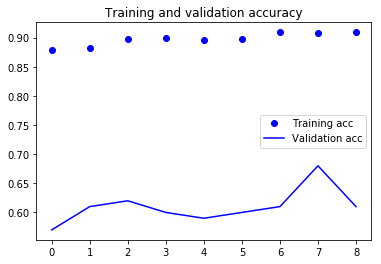

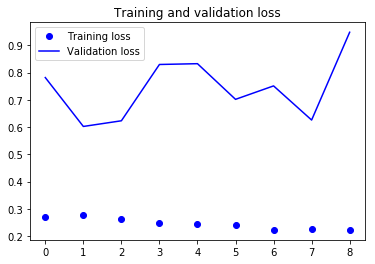

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()